                                     url  feature1  feature2  target  \
0  https://example.com/path/to/page.html       1.2       5.6       0   
1        http://another-example.org/page       3.4       7.8       1   

                                 tokenized_url  \
0  [https, example, com, path, to, page, html]   
1          [http, another, example, org, page]   

                                          url_vector  
0  [-0.0023311186, -8.4740976e-05, 0.0019607383, ...  
1  [-0.0048886593, 0.0035040143, -0.00077881356, ...  


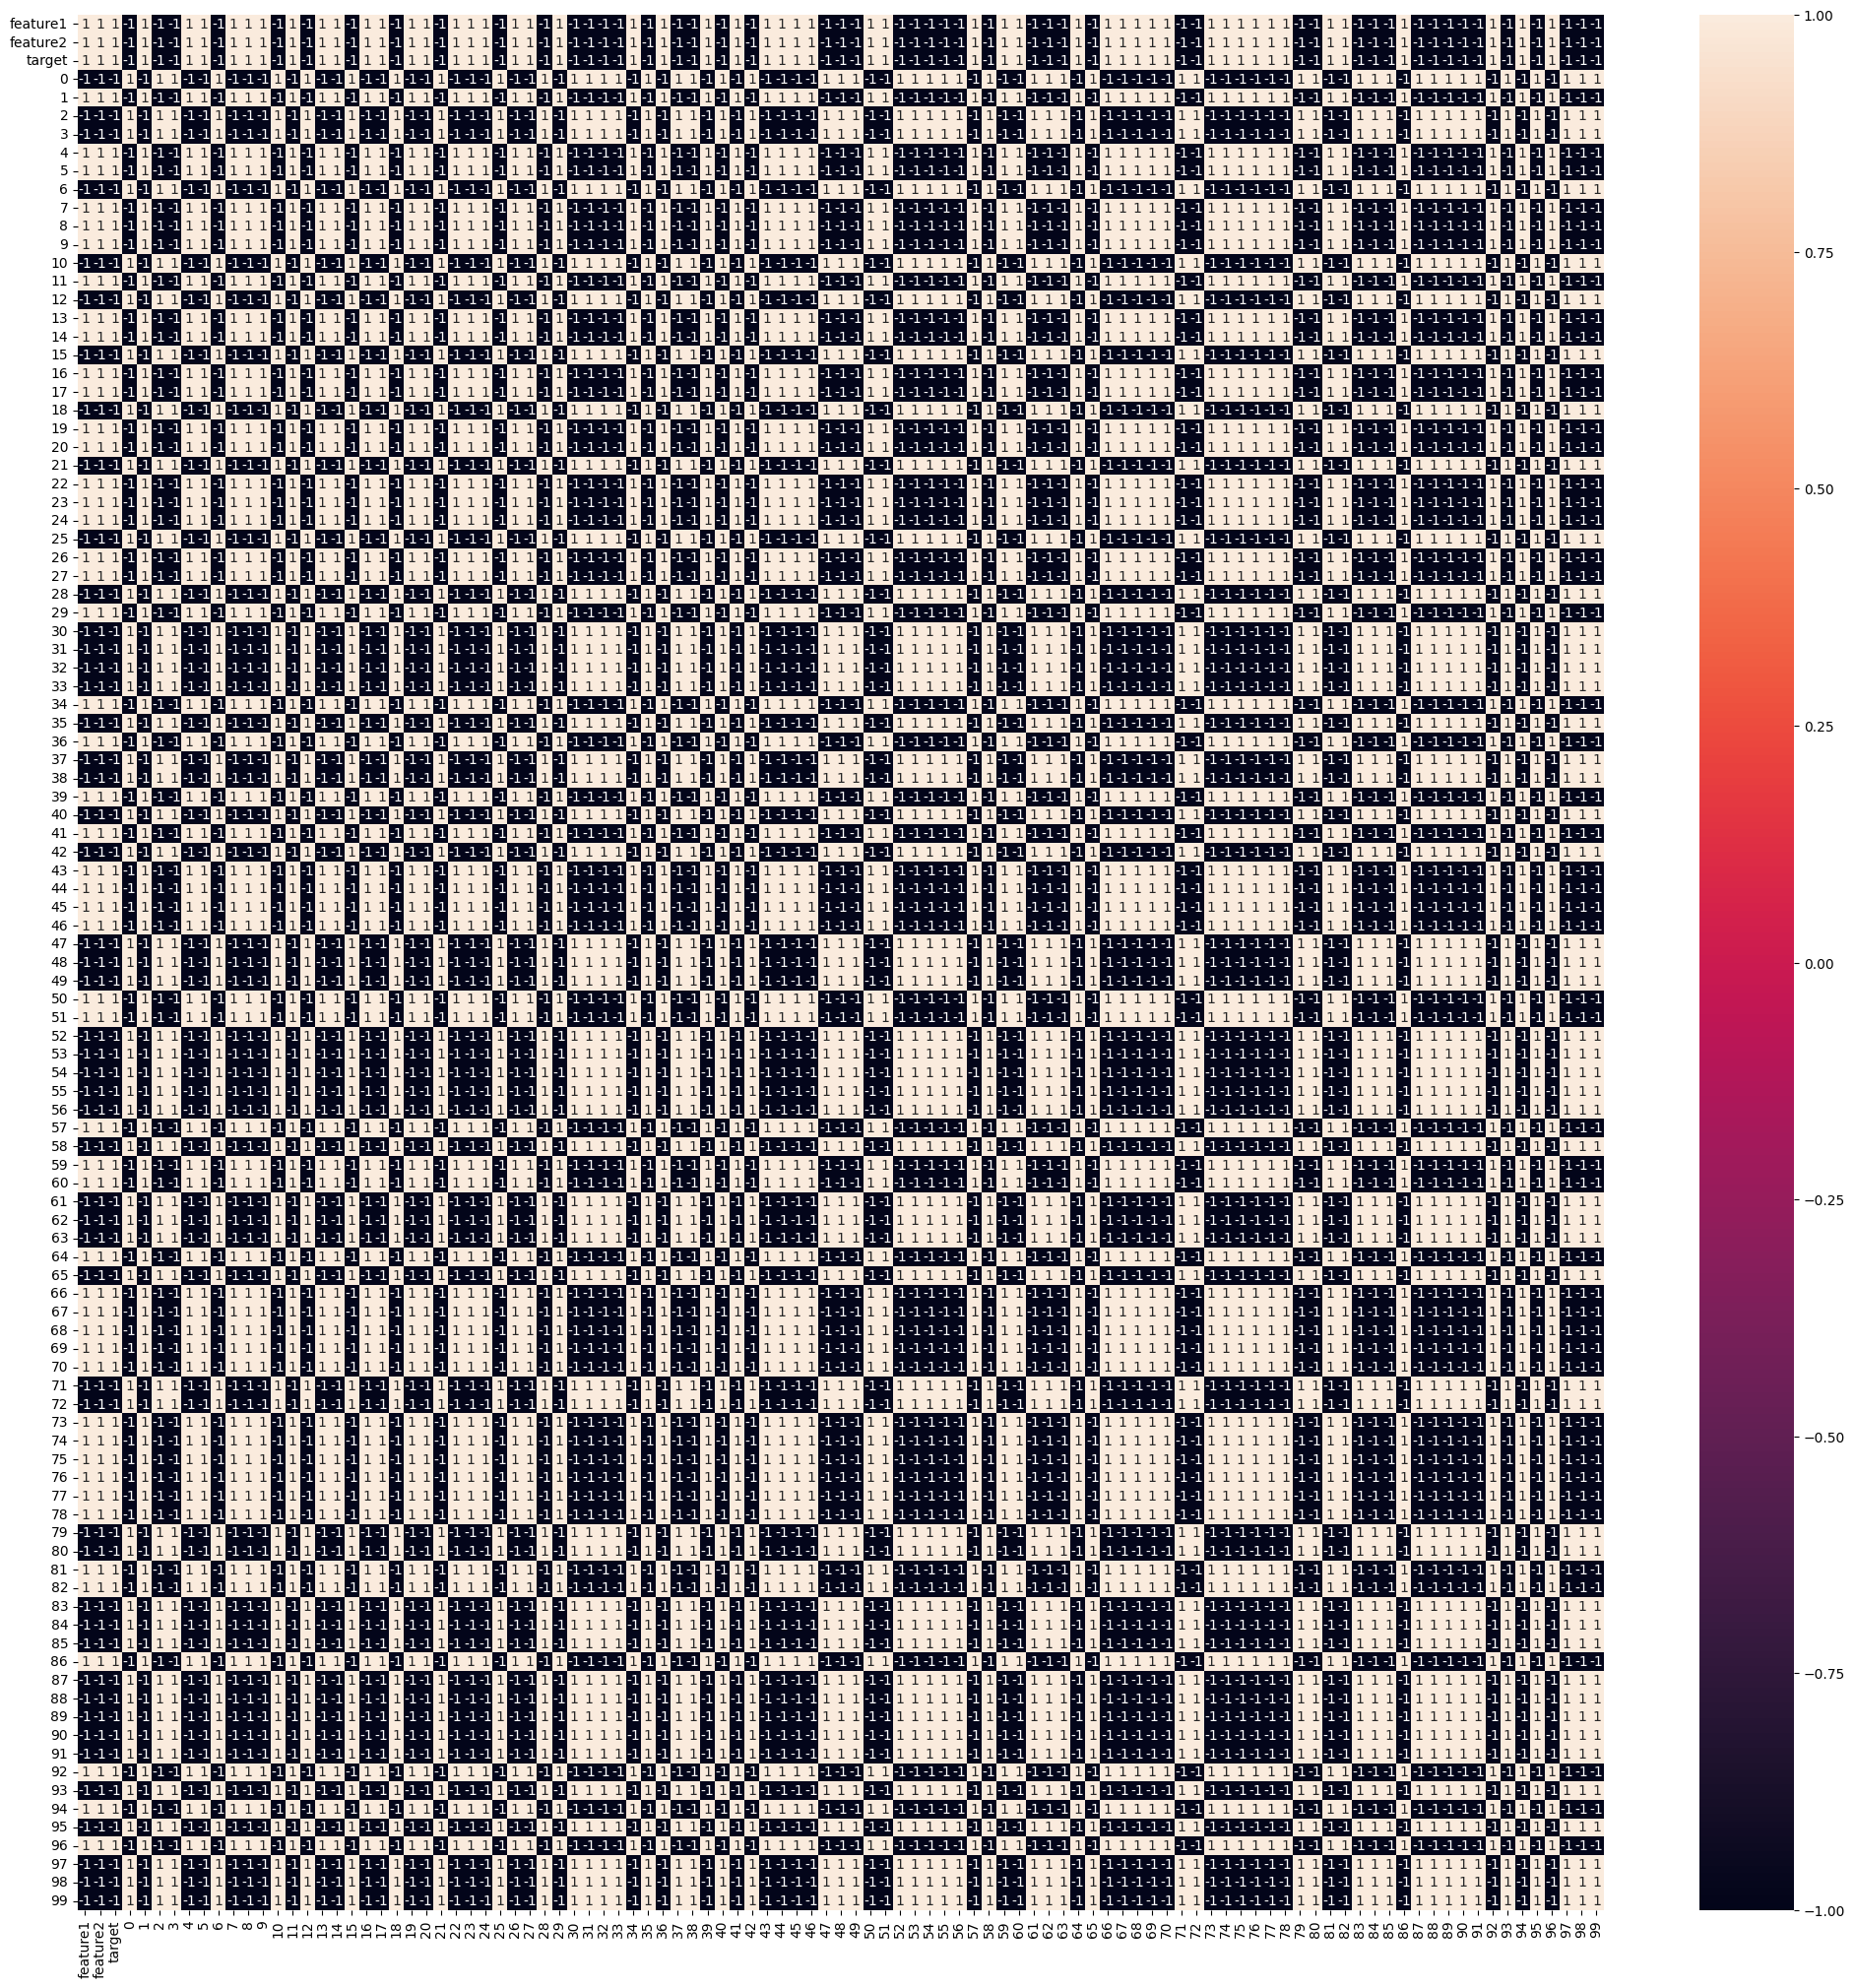

          feature1  feature2  target    0    1    2    3    4    5    6  ...  \
feature1       1.0       1.0     1.0 -1.0  1.0 -1.0 -1.0  1.0  1.0 -1.0  ...   
feature2       1.0       1.0     1.0 -1.0  1.0 -1.0 -1.0  1.0  1.0 -1.0  ...   
target         1.0       1.0     1.0 -1.0  1.0 -1.0 -1.0  1.0  1.0 -1.0  ...   
0             -1.0      -1.0    -1.0  1.0 -1.0  1.0  1.0 -1.0 -1.0  1.0  ...   
1              1.0       1.0     1.0 -1.0  1.0 -1.0 -1.0  1.0  1.0 -1.0  ...   
...            ...       ...     ...  ...  ...  ...  ...  ...  ...  ...  ...   
95            -1.0      -1.0    -1.0  1.0 -1.0  1.0  1.0 -1.0 -1.0  1.0  ...   
96             1.0       1.0     1.0 -1.0  1.0 -1.0 -1.0  1.0  1.0 -1.0  ...   
97            -1.0      -1.0    -1.0  1.0 -1.0  1.0  1.0 -1.0 -1.0  1.0  ...   
98            -1.0      -1.0    -1.0  1.0 -1.0  1.0  1.0 -1.0 -1.0  1.0  ...   
99            -1.0      -1.0    -1.0  1.0 -1.0  1.0  1.0 -1.0 -1.0  1.0  ...   

           90   91   92   93   94   95 

In [6]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
import re

# Sample data
data = {
    'url': ["https://example.com/path/to/page.html", "http://another-example.org/page"],
    'feature1': [1.2, 3.4],
    'feature2': [5.6, 7.8],
    'target': [0, 1]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Tokenization function
def tokenize_url(url):
    tokens = re.split(r'\W+', url)
    tokens = [token.lower() for token in tokens if token]
    return tokens

# Tokenize URLs
df['tokenized_url'] = df['url'].apply(tokenize_url)

# Train Word2Vec model
tokenized_urls = df['tokenized_url'].tolist()
model = Word2Vec(sentences=tokenized_urls, vector_size=100, window=5, min_count=1, workers=4)

# Function to aggregate token vectors
def aggregate_vectors(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Create URL vectors
df['url_vector'] = df['tokenized_url'].apply(lambda x: aggregate_vectors(x, model))

print(df)

# Expand URL vectors into separate columns
url_vector_df = pd.DataFrame(df['url_vector'].to_list(), index=df.index)

# Combine with other features
combined_df = pd.concat([df.drop(columns=['url', 'tokenized_url', 'url_vector']), url_vector_df], axis=1)

# Compute correlation matrix
correlation_matrix = combined_df.corr()

import seaborn as sns

# Plot the correlation matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Display the correlation matrix
print(correlation_matrix)